In [ ]:
# Data Manipulation & Numerical Operations
import pandas as pd  
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [4]:
Data = pd.read_csv("../dataset/heart_disease_risk_dataset_earlymed.csv")

In [5]:
Data

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [7]:
Data.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [8]:
# Checking for null values in dataset
Data.isnull().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

In [9]:
Data.columns

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')

In [10]:
# Removing duplicate rows  in dataset
Data = Data.drop_duplicates()
Data

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0


/tmp/ipykernel_794/1165595192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Data["Heart_Risk"], palette="coolwarm")


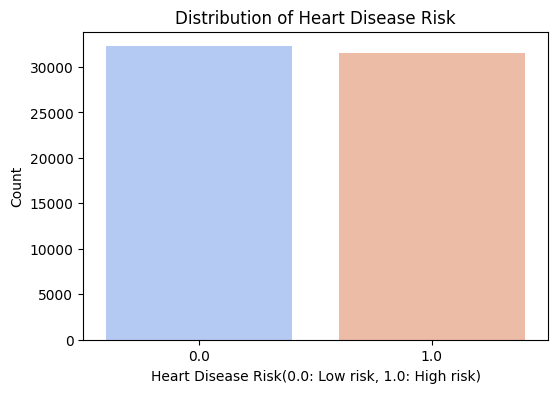

In [11]:
# Target value distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=Data["Heart_Risk"], palette="coolwarm")
plt.xlabel("Heart Disease Risk(0.0: Low risk, 1.0: High risk)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease Risk")
plt.show()

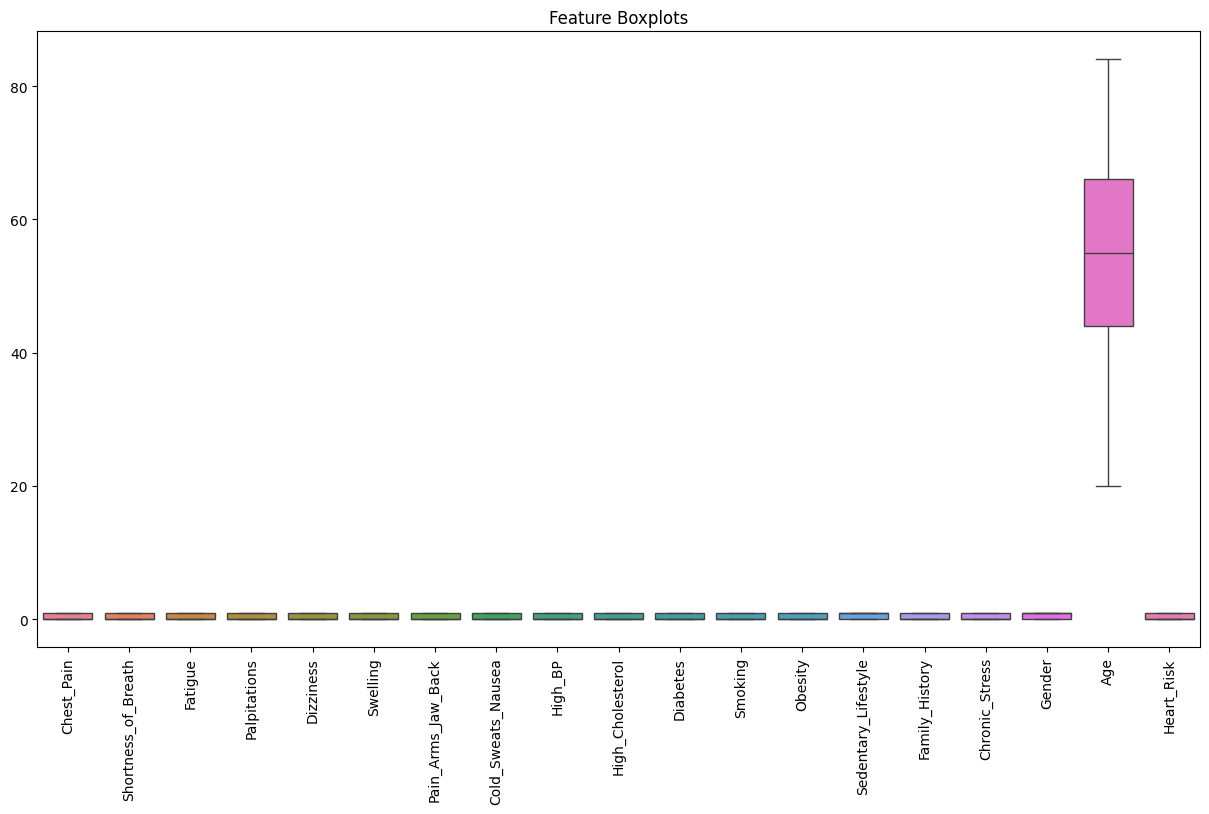

In [12]:
# Checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=Data)
plt.xticks(rotation=90)
plt.title("Feature Boxplots")
plt.show()

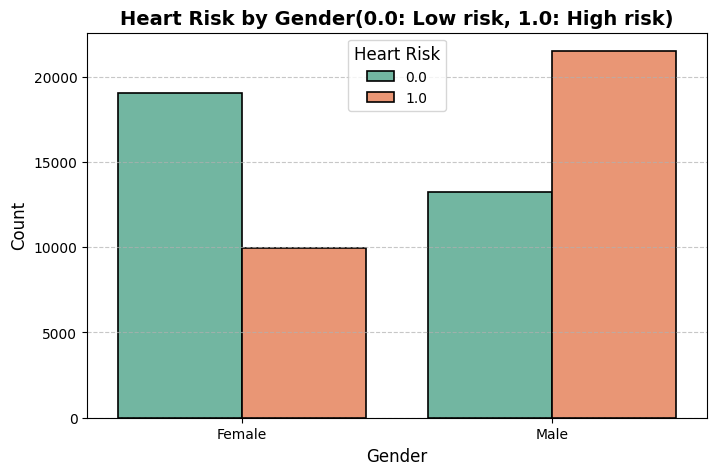

In [13]:
# Mapping Gender values for better readability
gender_labels = {0: 'Female', 1: 'Male'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x=Data['Gender'].map(gender_labels),  # Convert numerical to categorical labels
    hue='Heart_Risk', 
    data=Data, 
    palette='Set2', 
    edgecolor='black', 
    linewidth=1.2
)

plt.title('Heart Risk by Gender(0.0: Low risk, 1.0: High risk)', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Risk', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


/tmp/ipykernel_794/1009147719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y='Age', data=Data, palette='pastel')


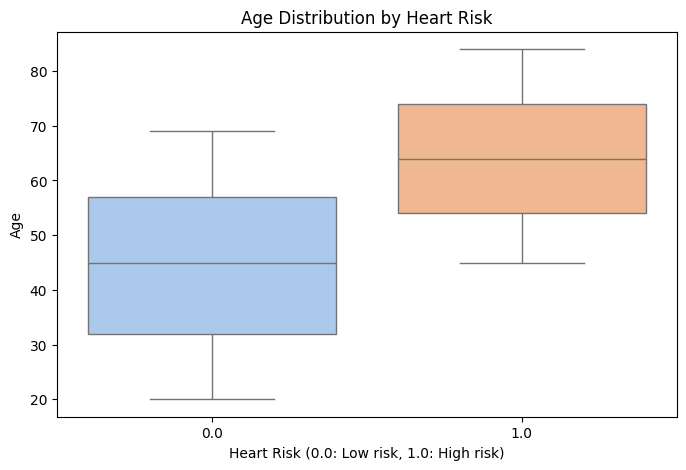

In [14]:
# age distribution by heart risk
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart_Risk', y='Age', data=Data, palette='pastel')
plt.title('Age Distribution by Heart Risk')
plt.xlabel('Heart Risk (0.0: Low risk, 1.0: High risk)')
plt.ylabel('Age')
plt.show()

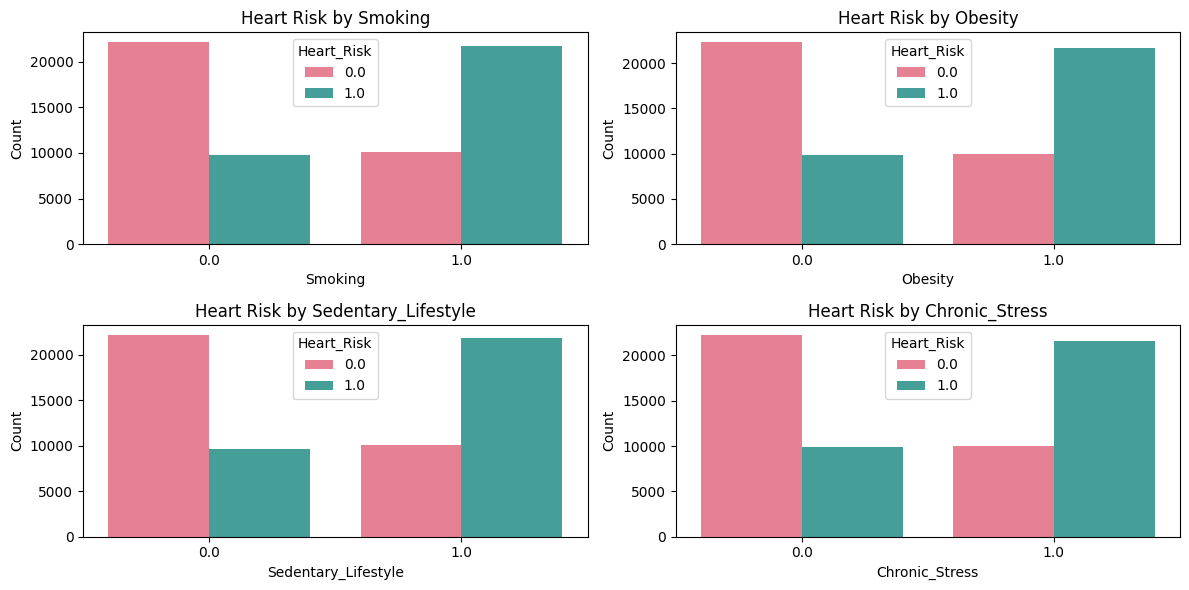

In [15]:
lifestyle_factors = ['Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Chronic_Stress']

plt.figure(figsize=(12, 6))
for i, col in enumerate(lifestyle_factors, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Heart_Risk', data=Data, palette='husl')
    plt.title(f'Heart Risk by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

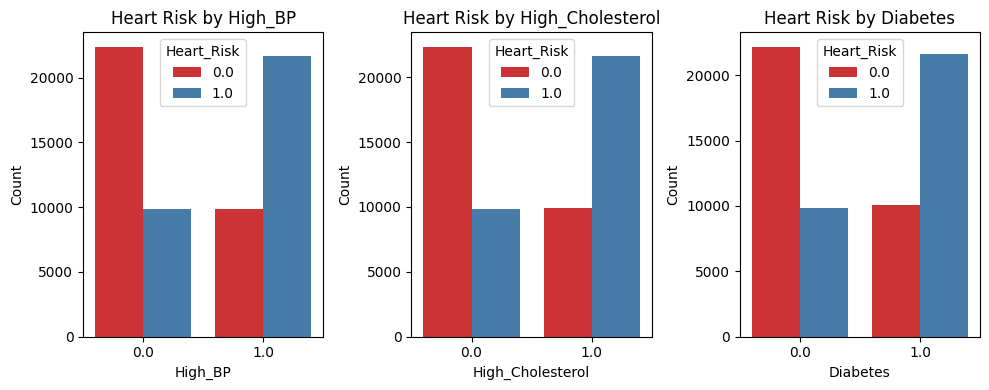

In [16]:
medical_conditions = ['High_BP', 'High_Cholesterol', 'Diabetes']

plt.figure(figsize=(10, 4))
for i, col in enumerate(medical_conditions, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='Heart_Risk', data=Data, palette='Set1')
    plt.title(f'Heart Risk by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

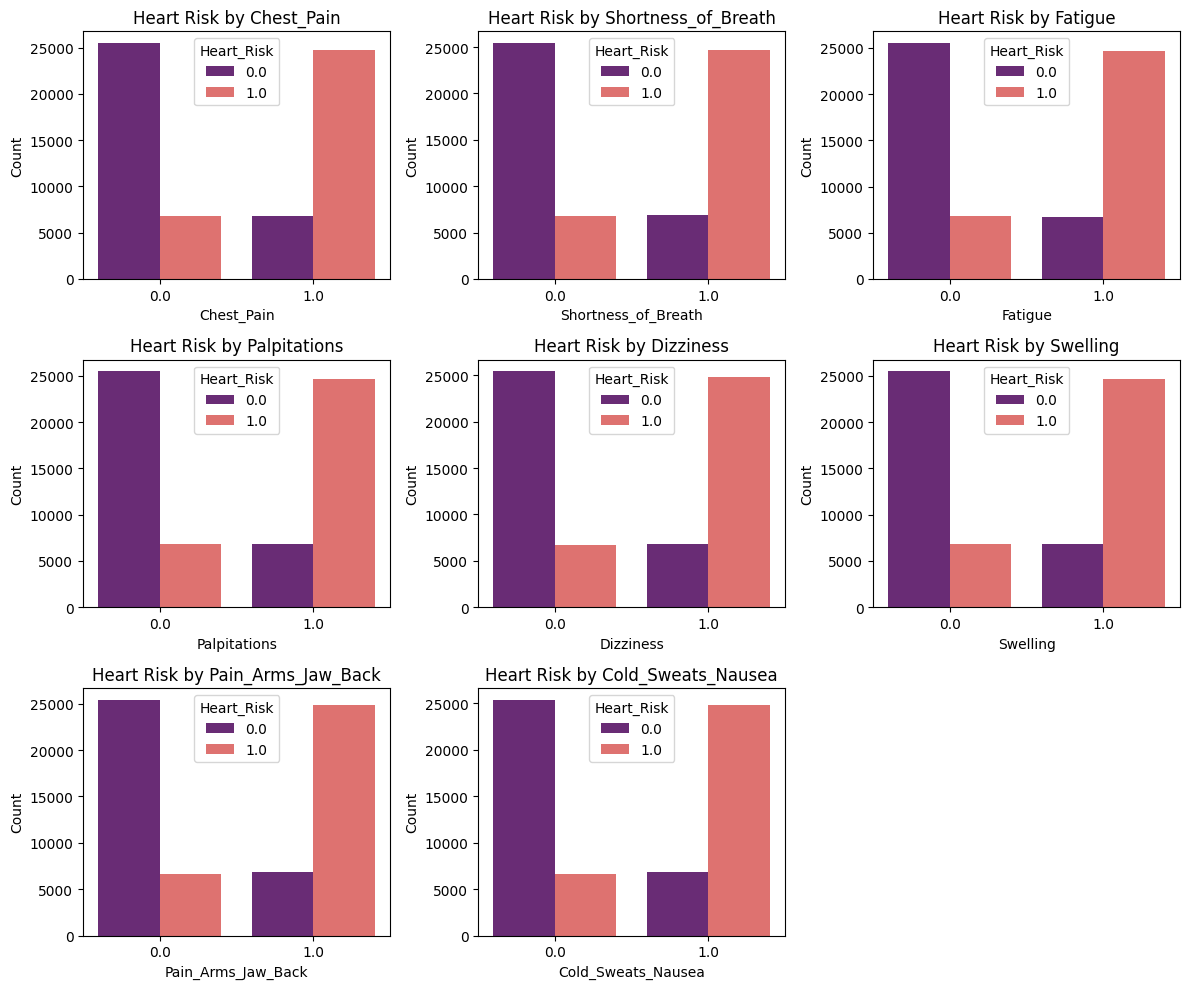

In [17]:
symptoms = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
            'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea']

plt.figure(figsize=(12, 10))
for i, col in enumerate(symptoms, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Heart_Risk', data=Data, palette='magma')
    plt.title(f'Heart Risk by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

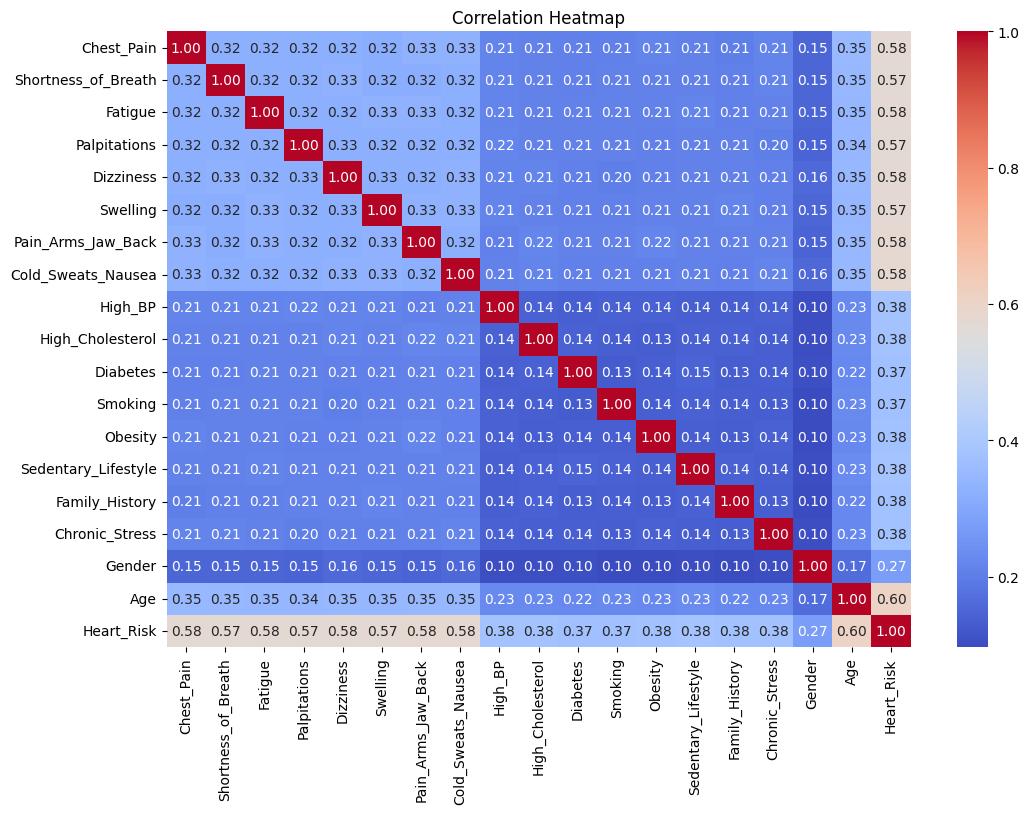

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
# No need to drop any feature as there is not strong correlation bw feature and target

# Finding Best Model

In [19]:
X = Data.drop(columns=['Heart_Risk']) 
y = Data['Heart_Risk']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Scores = {scores}")

Logistic Regression: Mean Accuracy = 0.9908, Scores = [0.98988315 0.99168693 0.99137323 0.9906674  0.99051055]
Decision Tree: Mean Accuracy = 0.9800, Scores = [0.9816485  0.98023684 0.98125637 0.97874676 0.97811936]
Random Forest: Mean Accuracy = 0.9911, Scores = [0.99043212 0.99137323 0.9922359  0.99090267 0.99058897]
SVM: Mean Accuracy = 0.9920, Scores = [0.99105952 0.99262803 0.99231433 0.9925496  0.99121638]
XGBoost: Mean Accuracy = 0.9915, Scores = [0.99145165 0.99168693 0.9919222  0.99145165 0.99105952]
